LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 

유지할 수 있는 기준을 유지하며 차원 축소
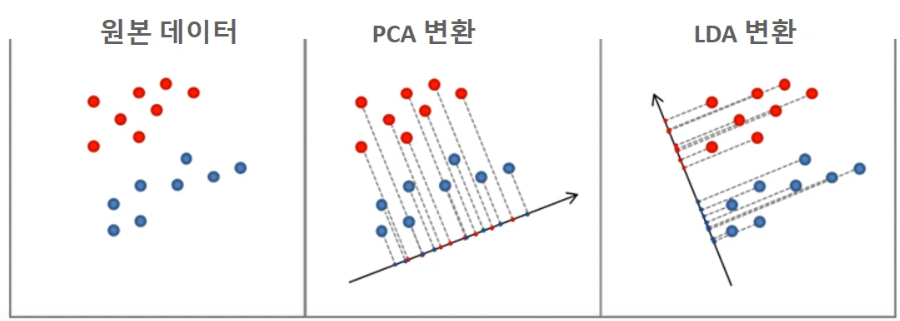

클래스 간 분산 최대화

클래스 내부 분산 최소화



In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data) # scaled_feature

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # fit()호출 시 target값 입력 
iris_lda = lda.transform(iris_scaled) # LDA scaled_feature
print(iris_lda.shape)

(150, 2)


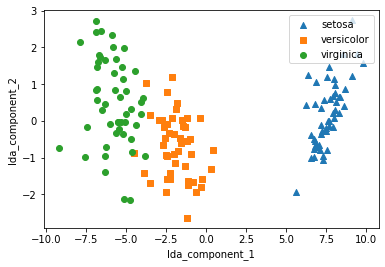

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores_pca = cross_val_score(rcf, iris_lda, iris.target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca))) # 2개의 feature만 가지고도 분류 잘 할 수 있음
# 상관도가 높은 feature가 많은 경우 유용함

# [0.88 0.88 0.88] <== PCA acc

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [1.   0.9  0.94]
PCA 변환 데이터 셋 평균 정확도:0.9467
